In [6]:
!pip install pandas matplotlib seaborn openai

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [8]:
file_path = "happiness.csv"   # using your dataset
df = pd.read_csv(file_path)

df.head()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xfc in position 150331: invalid start byte

In [9]:
file_path = "happiness.csv"

df = pd.read_csv(file_path, encoding="latin1")

df.head()


,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.350,0.451,50.5,0.718,0.164,0.882,0.414,0.258
1,Afghanistan,2009,4.402,7.509,0.552,50.8,0.679,0.187,0.850,0.481,0.237
2,Afghanistan,2010,4.758,7.614,0.539,51.1,0.600,0.118,0.707,0.517,0.275
3,Afghanistan,2011,3.832,7.581,0.521,51.4,0.496,0.160,0.731,0.480,0.267
4,Afghanistan,2012,3.783,7.661,0.521,51.7,0.531,0.234,0.776,0.614,0.268


In [10]:
print("Dataset Info:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2363 entries, 0 to 2362
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2363 non-null   object 
 1   year                              2363 non-null   int64  
 2   Life Ladder                       2363 non-null   float64
 3   Log GDP per capita                2335 non-null   float64
 4   Social support                    2350 non-null   float64
 5   Healthy life expectancy at birth  2300 non-null   float64
 6   Freedom to make life choices      2327 non-null   float64
 7   Generosity                        2282 non-null   float64
 8   Perceptions of corruption         2238 non-null   float64
 9   Positive affect                   2339 non-null   float64
 10  Negative affect                   2347 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 203.2+

In [11]:
numeric_df = df.select_dtypes(include='number')
corr = numeric_df.corr()

corr


,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
year,1.000000,0.046846,0.080104,-0.043074,0.168026,0.232974,0.030864,-0.082136,0.013052,0.207642
Life Ladder,0.046846,1.000000,0.783556,0.722738,0.714927,0.538210,0.177398,-0.430485,0.515283,-0.352412
Log GDP per capita,0.080104,0.783556,1.000000,0.685329,0.819326,0.364816,-0.000766,-0.353893,0.230868,-0.260689
Social support,-0.043074,0.722738,0.685329,1.000000,0.597787,0.404131,0.065240,-0.221410,0.424524,-0.454878
Healthy life expectancy at birth,0.168026,0.714927,0.819326,0.597787,1.000000,0.375745,0.015168,-0.303130,0.217982,-0.150330
Freedom to make life choices,0.232974,0.538210,0.364816,0.404131,0.375745,1.000000,0.321396,-0.466023,0.578398,-0.278959
Generosity,0.030864,0.177398,-0.000766,0.065240,0.015168,0.321396,1.000000,-0.270004,0.300608,-0.071975
Perceptions of corruption,-0.082136,-0.430485,-0.353893,-0.221410,-0.303130,-0.466023,-0.270004,1.000000,-0.274208,0.265555
Positive affect,0.013052,0.515283,0.230868,0.424524,0.217982,0.578398,0.300608,-0.274208,1.000000,-0.334451
Negative affect,0.207642,-0.352412,-0.260689,-0.454878,-0.150330,-0.278959,-0.071975,0.265555,-0.334451,1.000000


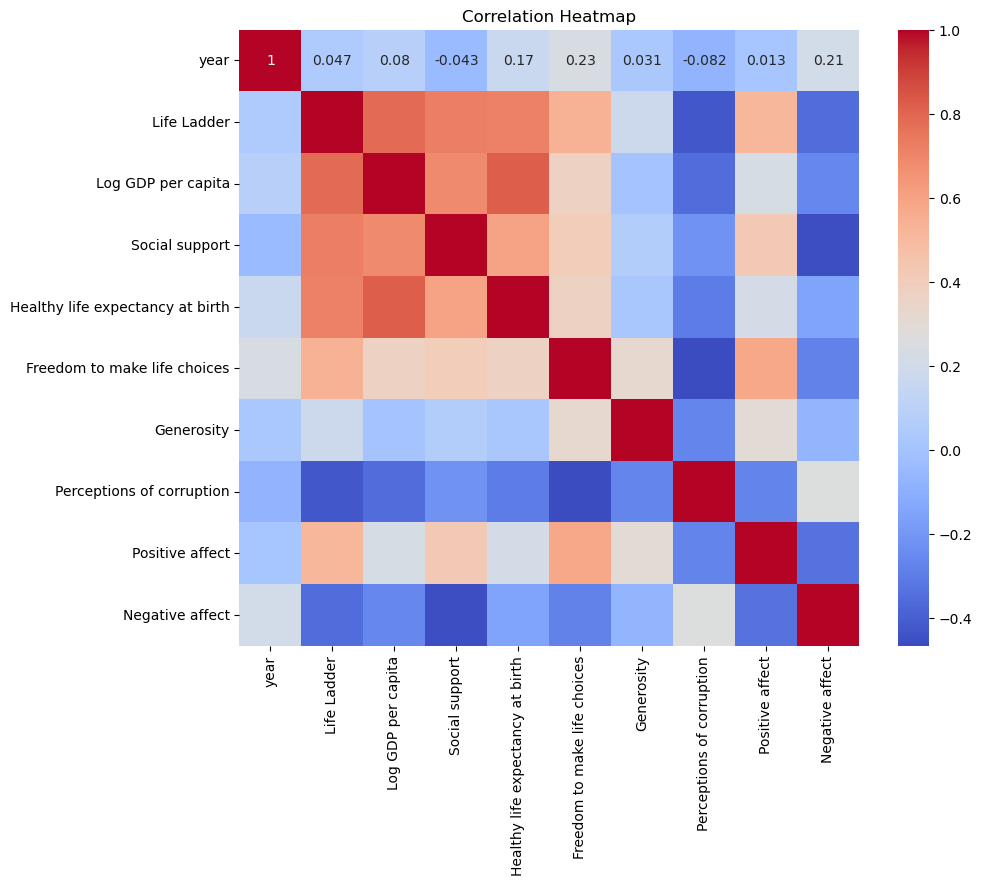

In [12]:
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm")

plt.title("Correlation Heatmap")

plt.savefig("correlation.png")   # saves image
plt.show()


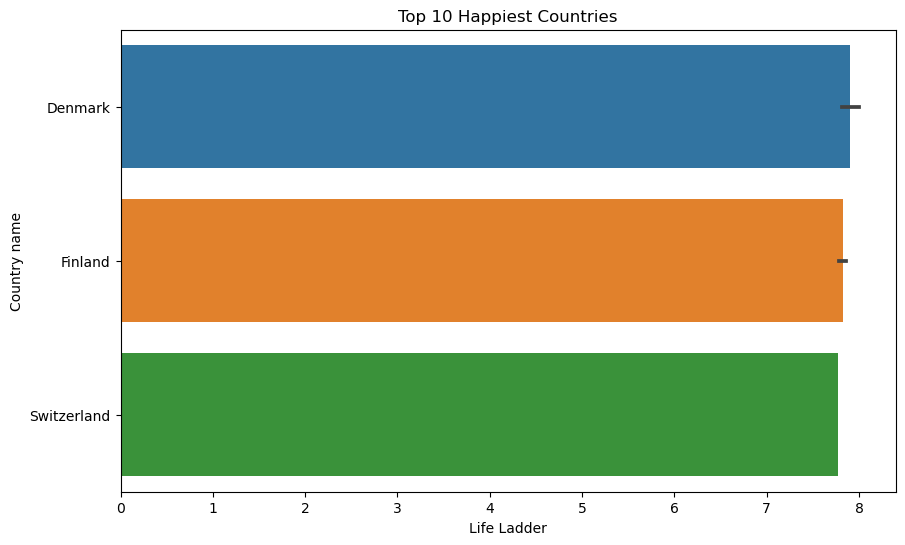

In [13]:
top_countries = df.sort_values(by="Life Ladder", ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x="Life Ladder", y="Country name", data=top_countries)

plt.title("Top 10 Happiest Countries")

plt.savefig("top_happy_countries.png")
plt.show()


In [14]:
summary = {
    "columns": list(df.columns),
    "shape": df.shape,
    "missing_values": df.isnull().sum().to_dict(),
    "describe": df.describe().to_dict()
}

summary


{'columns': ['Country name',
  'year',
  'Life Ladder',
  'Log GDP per capita',
  'Social support',
  'Healthy life expectancy at birth',
  'Freedom to make life choices',
  'Generosity',
  'Perceptions of corruption',
  'Positive affect',
  'Negative affect'],
 'shape': (2363, 11),
 'missing_values': {'Country name': 0,
  'year': 0,
  'Life Ladder': 0,
  'Log GDP per capita': 28,
  'Social support': 13,
  'Healthy life expectancy at birth': 63,
  'Freedom to make life choices': 36,
  'Generosity': 81,
  'Perceptions of corruption': 125,
  'Positive affect': 24,
  'Negative affect': 16},
 'describe': {'year': {'count': 2363.0,
   'mean': 2014.7638595006347,
   'std': 5.059436468192803,
   'min': 2005.0,
   '25%': 2011.0,
   '50%': 2015.0,
   '75%': 2019.0,
   'max': 2023.0},
  'Life Ladder': {'count': 2363.0,
   'mean': 5.483565806178587,
   'std': 1.1255215132391931,
   'min': 1.281,
   '25%': 4.647,
   '50%': 5.449,
   '75%': 6.3235,
   'max': 8.019},
  'Log GDP per capita': {'count'

In [15]:
import os
print(os.environ.get("AIPROXY_TOKEN"))


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


In [16]:
!pip install openai



In [17]:
from openai import OpenAI
import os

client = OpenAI(
    api_key=os.environ["AIPROXY_TOKEN"],
    base_url="https://openrouter.ai/api/v1"
)


In [18]:
response = client.chat.completions.create(
    model="openai/gpt-4o-mini",
    messages=[
        {"role": "user", "content": "Say hello"}
    ]
)

print(response.choices[0].message.content)


Hello! How can I assist you today?


In [19]:
summary = {
    "columns": list(df.columns),
    "shape": df.shape,
    "missing_values": df.isnull().sum().to_dict(),
    "describe": df.describe().to_dict()
}

summary


{'columns': ['Country name',
  'year',
  'Life Ladder',
  'Log GDP per capita',
  'Social support',
  'Healthy life expectancy at birth',
  'Freedom to make life choices',
  'Generosity',
  'Perceptions of corruption',
  'Positive affect',
  'Negative affect'],
 'shape': (2363, 11),
 'missing_values': {'Country name': 0,
  'year': 0,
  'Life Ladder': 0,
  'Log GDP per capita': 28,
  'Social support': 13,
  'Healthy life expectancy at birth': 63,
  'Freedom to make life choices': 36,
  'Generosity': 81,
  'Perceptions of corruption': 125,
  'Positive affect': 24,
  'Negative affect': 16},
 'describe': {'year': {'count': 2363.0,
   'mean': 2014.7638595006347,
   'std': 5.059436468192803,
   'min': 2005.0,
   '25%': 2011.0,
   '50%': 2015.0,
   '75%': 2019.0,
   'max': 2023.0},
  'Life Ladder': {'count': 2363.0,
   'mean': 5.483565806178587,
   'std': 1.1255215132391931,
   'min': 1.281,
   '25%': 4.647,
   '50%': 5.449,
   '75%': 6.3235,
   'max': 8.019},
  'Log GDP per capita': {'count'

In [20]:
prompt = f"""
Write a story-style analysis of this dataset.

Include:

1. Brief description of dataset
2. Analysis performed
3. Key insights discovered
4. Implications or recommendations

Data summary:
{summary}
"""

response = client.chat.completions.create(
    model="openai/gpt-4o-mini",
    messages=[{"role": "user", "content": prompt}]
)

story = response.choices[0].message.content

print(story)


**A Story-Style Analysis of Global Well-Being Dataset**

**1. The Dataset: A Tapestry of Well-Being Across Nations**

In the bustling realm of global data, a rich tapestry unfolds, capturing the intricate patterns of well-being across countries and years. This dataset, comprised of 2,363 entries spanning multiple years from 2005 to 2023, presents a detailed picture of life across nations. It includes various factors that contribute to national happiness and life satisfaction, such as the Life Ladder (a subjective measure of life satisfaction), Log GDP per capita, social support, healthy life expectancy, personal freedoms, generosity, perceptions of corruption, and emotional wellbeing metrics (positive and negative affect). Each of these variables reveals facets of the human experience, inviting analysts to explore the secrets they hold.

**2. The Analysis: Unearthing Insights through Exploration**

Equipped with this dataset, we embarked on a journey through the numbers, employing comp

In [21]:
with open("README.md","w",encoding="utf-8") as f:
    f.write(story)


In [22]:
uv run autolysis.py dataset.csv


SyntaxError: invalid syntax (118277882.py, line 1)

In [23]:
import os
os.getcwd()


'C:\\Users\\Administrator\\project2'